# Exploratory Data Analysis and Feature Engineering using Zomato Bangalore Restaurants Dataset from Kaggle
## Context:
The data is from an Indian resturant search and discovery company, Zomato. And focuses on the Indian city of Bengalore. This is a dataset that I dived into without any idea of what I was looking for. I systematically attacked each variable and tried to glean as much information as I could from it. While doing so, I went online and found GeoPy, in the weeks to come I intend to use this same dataset for a Geographical Clustering Project. I do not see this project as anywhere near complete. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
zomato = pd.read_csv('zomato.csv')

In [4]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [5]:
zomato.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
zomato['menu_item'].nunique()

9098

In [8]:
#We dont need the URL or address for this analysis
zomato.drop(['url','address'],axis=1,inplace=True)

In [9]:
#Or phone number for that matter
zomato.drop(['phone'],axis=1,inplace=True)

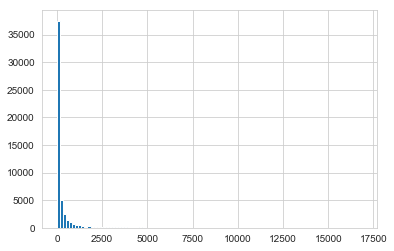

In [10]:
zomato['votes'].hist(bins=100)

In [11]:
zomato['logVotes'] = zomato['votes'].apply(lambda x: np.log(x))

In [12]:
zomato.drop('logVotes',axis=1,inplace=True)

In [13]:
zomato.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
sns.heatmap(zomato.isna())

In [ ]:
#I sense a lot of potential in this
zomato['rest_type'].value_counts()

In [ ]:
sns.countplot(zomato['online_order'])

In [ ]:
sns.countplot(zomato['book_table'])

In [ ]:
#Could these locations be divided into high frequency
zomato['location'].value_counts()

In [ ]:
zomato['listed_in(type)'].value_counts()

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(zomato['listed_in(type)'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
#Fizing the ratings column
float(zomato['rate'][0].split('/')[0])

In [ ]:
#Some more possibilities through this
zomato['rate'].value_counts()

In [ ]:
zomato['new_rest'] = 0


In [ ]:
def new_transformer(string):
    if string == 'NEW':
        return 1
    else:
        return 0

In [ ]:
#Creating a dummy variable for new resturants
zomato['new_rest'] = zomato['rate'].apply(lambda x: new_transformer(x))

In [ ]:
zomato['new_rest'].value_counts()

In [ ]:
zomato['rate'].isna().sum()

In [ ]:
zomato['rate'].fillna(value='0/5',inplace=True)


In [ ]:
zomato['rate'].isna().sum()

In [ ]:
zomato['rate'].replace(to_replace='NEW',value='0/5',inplace=True)

In [ ]:
zomato['rate'].replace(to_replace='-',value='0/5',inplace=True)

In [ ]:
float(zomato['rate'][0].split('/')[0])

In [ ]:
zomato['rate'] = zomato['rate'].apply(lambda x: float(x.split('/')[0]))

In [ ]:
zomato['rate'].describe()

In [ ]:
sns.kdeplot(zomato['rate'])

In [ ]:
zomato['approx_cost(for two people)'].nunique()

In [ ]:
zomato['approx_cost(for two people)'].value_counts()

In [ ]:
zomato.dropna(subset=['approx_cost(for two people)'],inplace=True)

In [ ]:
type(zomato['approx_cost(for two people)'][0])

In [ ]:
zomato['approx_cost(for two people)'][51687].replace(',','')


In [ ]:
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].apply(lambda x : x.replace(',',''))


In [ ]:
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].apply(lambda x: float(x))

In [ ]:
sns.kdeplot(zomato['approx_cost(for two people)'])

In [ ]:
zomato['menu_item'][0]

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='listed_in(city)', data=zomato)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
zomato['name'].value_counts()

In [ ]:
ratings = pd.DataFrame(zomato.groupby('name')['rate'].mean())


In [ ]:
ratings['num of ratings'] = pd.DataFrame(zomato.groupby('name')['rate'].count())
ratings.head()

In [ ]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

In [ ]:
plt.figure(figsize=(10,4))
ratings['rate'].hist(bins=70)

In [ ]:
sns.heatmap(ratings[ratings['rate']>0])

In [ ]:
sns.jointplot(x='rate',y='num of ratings',data=ratings,alpha=0.5)

In [ ]:
zomato.drop('rest_type',axis=1,inplace=True)

In [ ]:
x =  zomato['cuisines'][0].split(',')[1]
x

In [ ]:
zomato.dropna(subset= ['cuisines'],inplace=True)

In [ ]:
zomato['cuisine_type1'] = zomato['cuisines'].apply(lambda x: x.split(',')[0])
zomato['cuisine_type1']

In [ ]:
zomato['cuisine_type1'].value_counts()

In [ ]:
zomato['cuisines'] =zomato['cuisines'].apply(lambda x: x.split(','))

In [ ]:
def cuisine_getter(x):
    if len(x) > 1:
        return x[1]
    else:
        return ''

In [ ]:
x = cuisine_getter(zomato['cuisines'][0])
x

In [ ]:
zomato['cuisine_type2'] = zomato['cuisines'].apply(lambda x: cuisine_getter(x))


In [ ]:
zomato['cuisine_type2'] 

In [ ]:
zomato['no_of_cuisines'] = zomato['cuisines'].apply(lambda x: len(x))

In [ ]:
zomato['no_of_cuisines'].describe()

In [ ]:
zomato['no_of_cuisines'].hist(bins=8)

In [ ]:
def cuisine_getter2(x):
    if len(x) > 2:
        return x[2]
    else:
        return ''

In [ ]:
zomato['cuisine_type3'] = zomato['cuisines'].apply(lambda x: cuisine_getter2(x))

In [ ]:
sns.clustermap(zomato.corr(),cmap='coolwarm')

In [ ]:
plt.figure(figsize=(10,7))
chains=zomato['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='viridis')
plt.title("Most famous restaurants")
plt.xlabel("Number of outlets")